### Preparation

In [33]:
import nltk, numpy as np, matplotlib.pyplot as plt
from nltk import word_tokenize
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer 

data = []
data_labels = []
with open("pos_tweets.txt", encoding="utf8") as f:
    pos = f.read()
    f.seek(0)  # returning the pointer to the beginning of the file
    for i in f: 
        data.append(i) 
        data_labels.append('pos')  # label can be anything
with open("neg_tweets.txt", encoding="utf8") as f:
    neg = f.read()
    f.seek(0)
    for i in f: 
        data.append(i)
        data_labels.append('neg')

tokens = word_tokenize(pos) + word_tokenize(neg)

# Lemmatizing the tokens
for index, item in enumerate(tokens):
    tokens[index] = WordNetLemmatizer().lemmatize(item)    

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

### Naive-Bayes Model (MultinomialNB) without using tf-idf

vocab_size: 1100 Number of Features:  1057
best: 0.8279
vocab_size: 1200 Number of Features:  1155
best: 0.8279
vocab_size: 1300 Number of Features:  1253
best: 0.8404
vocab_size: 1400 Number of Features:  1351
best: 0.8429
vocab_size: 1500 Number of Features:  1451
best: 0.8404
vocab_size: 1600 Number of Features:  1551
best: 0.8404
vocab_size: 1700 Number of Features:  1651
best: 0.8429
vocab_size: 1800 Number of Features:  1749
best: 0.8404
vocab_size: 1900 Number of Features:  1848
best: 0.8379
vocab_size: 2000 Number of Features:  1948
best: 0.8404
*** best accuracy *** :  0.8429


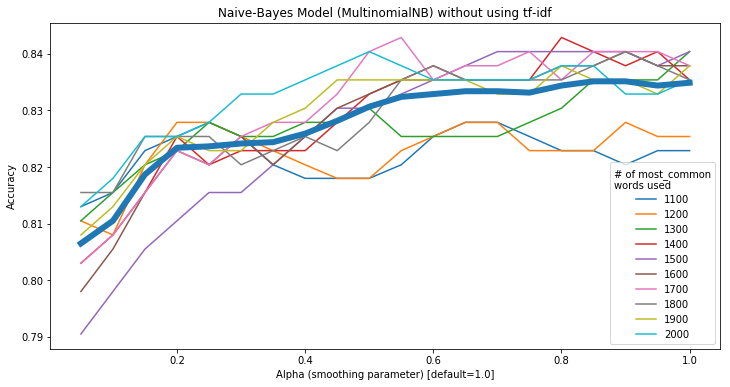

In [34]:
best_acc_total = 0
y_values = np.empty((0,20))
plt.figure(figsize=(12,6))
for m in range(1100, 2001, 100):
    most_common = [i[0] for i in Counter(w.lower() for w in tokens).most_common(m) if len(i[0]) > 1]

    vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), token_pattern = '[a-z][a-z]+', vocabulary=most_common) 
    features = vectorizer.fit_transform(data)
    print('vocab_size:', m, 'Number of Features: ', len(vectorizer.get_feature_names()))

    features_nd = features.toarray()

    X_train, X_val, y_train, y_val  = train_test_split(features_nd, data_labels, test_size=0.2, random_state=42)

    y = []
    best_acc = 0
    for alpha in np.arange(.05, 1.01, .05):
        pipe = Pipeline([#('tf', TfidfTransformer(use_idf=False)), 
            ('clf', MultinomialNB(alpha=alpha))])
        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_val)
        acc = round(accuracy_score(y_val, y_pred), 4)
        y.append(acc)
        if acc > best_acc:
            best_acc = acc
    print('best:', best_acc)
    plt.plot(np.arange(.05, 1.01, .05), y, label=str(m))
    y_values = np.vstack([y_values, np.array([y])])
    if best_acc > best_acc_total:
        best_acc_total = best_acc
print('*** best accuracy *** : ', best_acc_total)
mean = [np.mean(y_values[:,i]) for i in range(20)]
plt.plot(np.arange(.05, 1.01, .05), mean, linewidth=6)
plt.legend(title='# of most_common\nwords used', loc=4)
plt.xlabel('Alpha (smoothing parameter) [default=1.0]')
plt.ylabel('Accuracy')
plt.title("Naive-Bayes Model (MultinomialNB) without using tf-idf")
plt.show()


### Naive-Bayes Model (MultinomialNB) with using tf-idf

vocab_size: 1100 Number of Features:  1057
best: 0.798
vocab_size: 1200 Number of Features:  1155
best: 0.8005
vocab_size: 1300 Number of Features:  1253
best: 0.798
vocab_size: 1400 Number of Features:  1351
best: 0.793
vocab_size: 1500 Number of Features:  1451
best: 0.793
vocab_size: 1600 Number of Features:  1551
best: 0.7955
vocab_size: 1700 Number of Features:  1651
best: 0.7955
vocab_size: 1800 Number of Features:  1749
best: 0.798
vocab_size: 1900 Number of Features:  1848
best: 0.7955
vocab_size: 2000 Number of Features:  1948
best: 0.803
*** best accuracy *** :  0.803


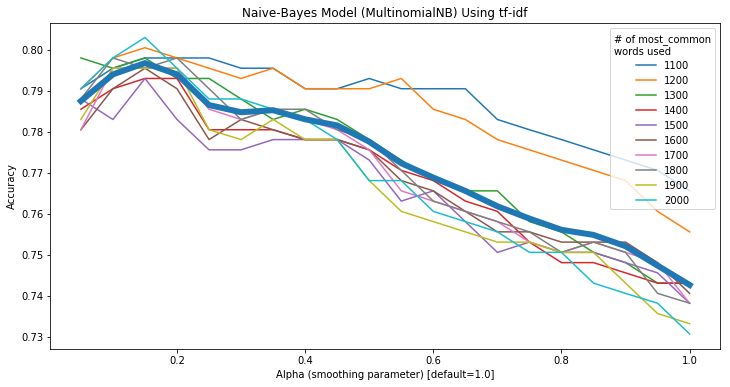

In [32]:
best_acc_total = 0
y_values = np.empty((0,20))
plt.figure(figsize=(12,6))
for m in range(1100, 2001, 100):
    most_common = [i[0] for i in Counter(w.lower() for w in tokens).most_common(m) if len(i[0]) > 1]

    vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), token_pattern = '[a-z][a-z]+', vocabulary=most_common) 
    features = vectorizer.fit_transform(data)
    print('vocab_size:', m, 'Number of Features: ', len(vectorizer.get_feature_names()))
    
    features_nd = features.toarray()

    X_train, X_val, y_train, y_val  = train_test_split(features_nd, data_labels, test_size=0.2, random_state=42)

    y = []
    best_acc = 0
    for alpha in np.arange(.05, 1.01, .05):
        pipe = Pipeline([('tf', TfidfTransformer(use_idf=True)), 
                        ('clf', MultinomialNB(alpha=alpha))])
        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_val)
        acc = round(accuracy_score(y_val, y_pred), 4)
        #print(acc)
        y.append(acc)
        if acc > best_acc:
            best_acc = acc
    print('best:', best_acc)
    plt.plot(np.arange(.05, 1.01, .05), y, label=str(m))
    y_values = np.vstack([y_values, np.array([y])])
    if best_acc > best_acc_total:
        best_acc_total = best_acc
print('*** best accuracy *** : ', best_acc_total)
mean = [np.mean(y_values[:,i]) for i in range(20)]
plt.plot(np.arange(.05, 1.01, .05), mean, linewidth=6)
plt.legend(title='# of most_common\nwords used', loc=1)
plt.xlabel('Alpha (smoothing parameter) [default=1.0]')
plt.ylabel('Accuracy')
plt.title('Naive-Bayes Model (MultinomialNB) Using tf-idf')
plt.show()


### Some Linear Models (SVM, LogisticRegression, ...)

In [ ]:
from sklearn.model_selection import ParameterGrid

best_acc_total = 0
y_values = np.empty((0,20))
plt.figure(figsize=(12,6))
for m in range(1100, 2001, 100):
    most_common = [i[0] for i in Counter(w.lower() for w in tokens).most_common(m) if len(i[0]) > 1]

    vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), token_pattern = '[a-z][a-z]+', vocabulary=most_common) 
    features = vectorizer.fit_transform(data)
    print('vocab_size:', m, 'Number of Features: ', len(vectorizer.get_feature_names()))
    
    features_nd = features.toarray()

    X_train, X_val, y_train, y_val  = train_test_split(features_nd, data_labels, test_size=0.2, random_state=42)

    y = []
    best_acc = 0
    for alpha in np.arange(.05, 1.01, .05):
        pipe = Pipeline([('tf', TfidfTransformer(use_idf=True)), 
                        ('clf', MultinomialNB(alpha=alpha))])
        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_val)
        acc = round(accuracy_score(y_val, y_pred), 4)
        #print(acc)
        y.append(acc)
        if acc > best_acc:
            best_acc = acc
    print('best:', best_acc)
    plt.plot(np.arange(.05, 1.01, .05), y, label=str(m))
    y_values = np.vstack([y_values, np.array([y])])
    if best_acc > best_acc_total:
        best_acc_total = best_acc
print('*** best accuracy *** : ', best_acc_total)
mean = [np.mean(y_values[:,i]) for i in range(20)]
plt.plot(np.arange(.05, 1.01, .05), mean, linewidth=6)
plt.legend(title='# of most_common\nwords used', loc=1)
plt.xlabel('Alpha (smoothing parameter) [default=1.0]')
plt.ylabel('Accuracy')
plt.title('Naive-Bayes Model (MultinomialNB) Using tf-idf')
plt.show()